In [3]:
from sklearn.linear_model import Perceptron
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("./train (1).csv")

data.head(n=20)[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
5,3,male,NaN,0,0,8.4583,Q,0
6,1,male,54.0,0,0,51.8625,S,0
7,3,male,2.0,3,1,21.0750,S,0
8,3,female,27.0,0,2,11.1333,S,1
9,2,female,14.0,1,0,30.0708,C,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Rellenamos los campos de edad vacíos con el promedio de edad.
data['Age'] = data['Age'].fillna(data['Age'].dropna().mean())
data["Embarked"].fillna(value = "S", inplace = True)
# Removemos los valores Null 
#data = data.dropna()

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
gender = set(data['Sex'].values)
gender = dict(zip(gender, range(len(gender))))
data['Sex'] = data['Sex'].map(lambda value: gender[value])

Embarked1 = set(data['Embarked'].values)
Embarked1 = dict(zip(Embarked1, range(len(Embarked1))))
data['Embarked'] = data['Embarked'].map(lambda value: Embarked1[value])

In [8]:
data.head(n=30)[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.000000,1,0,7.2500,0,0
1,1,0,38.000000,1,0,71.2833,2,1
2,3,0,26.000000,0,0,7.9250,0,1
3,1,0,35.000000,1,0,53.1000,0,1
4,3,1,35.000000,0,0,8.0500,0,0
5,3,1,29.699118,0,0,8.4583,1,0
6,1,1,54.000000,0,0,51.8625,0,0
7,3,1,2.000000,3,1,21.0750,0,0
8,3,0,27.000000,0,2,11.1333,0,1
9,2,0,14.000000,1,0,30.0708,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [10]:
# Seleccionamos todos los parámetros relevantes.
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']
X.shape, y.shape



((891, 7), (891,))

In [11]:
titanicdata = X.values
titanicdatalabel = y.values

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [13]:
def evaluate(model, X, y, test_size=0.2, fitted=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=0, shuffle=True)
    if not fitted:
        clf = model.fit(X_train, y_train)
    else :
        clf = model
    
    try:
        pred_train = clf.decision_function(X_train)
        pred_test = clf.decision_function(X_test)
    
        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        fpr, tpr, _ = roc_curve(y_train, pred_train)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_train, pred_train))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Training set")

        plt.subplot(122)
        fpr, tpr, _ = roc_curve(y_test, pred_test)
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_test, pred_test))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Test set")
    except AttributeError:
        try:
            pred_train = clf.predict_proba(X_train)
            pred_test = clf.predict_proba(X_test)
        except AttributeError:
            pred_train = clf.predict(X_train)
            pred_test = clf.predict(X_test)
    
        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        fpr, tpr, _ = roc_curve(y_train, pred_train[:, 1])
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_train, pred_train[:, 1]))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Training set")

        plt.subplot(122)
        fpr, tpr, _ = roc_curve(y_test, pred_test[:, 1])
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',lw=lw, label="AUC = %.3f " % roc_auc_score(y_test, pred_test[:, 1]))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0, 1.01])
        plt.ylim([0, 1.01])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.title("Test set")

    plt.show()

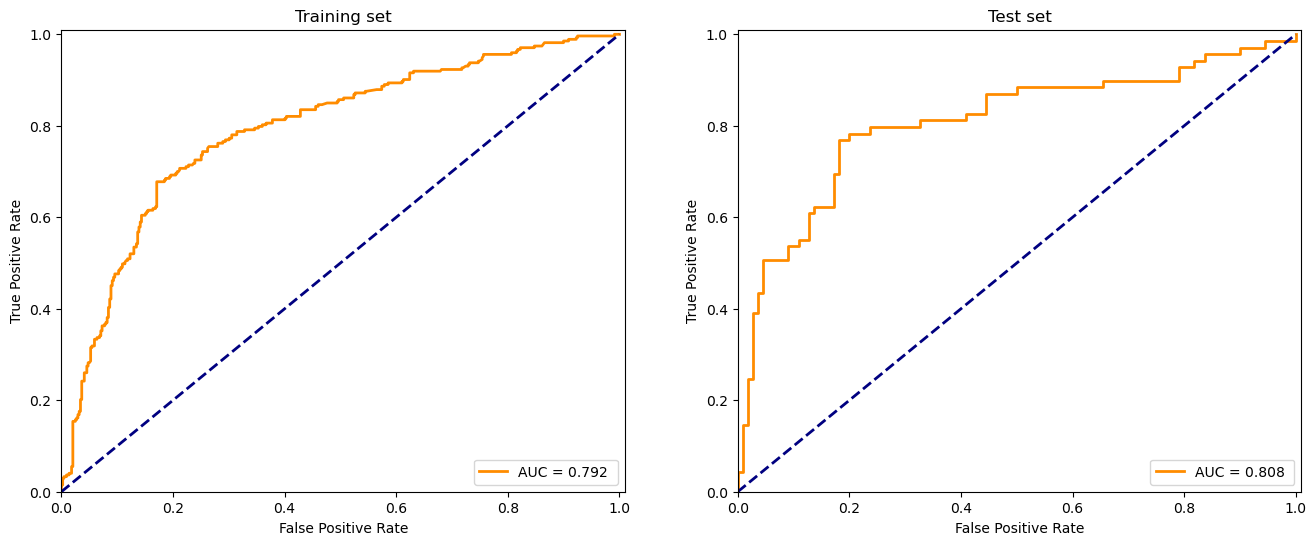

In [14]:
evaluate(Perceptron(), X, y)

In [15]:
from sklearn.neural_network import MLPClassifier

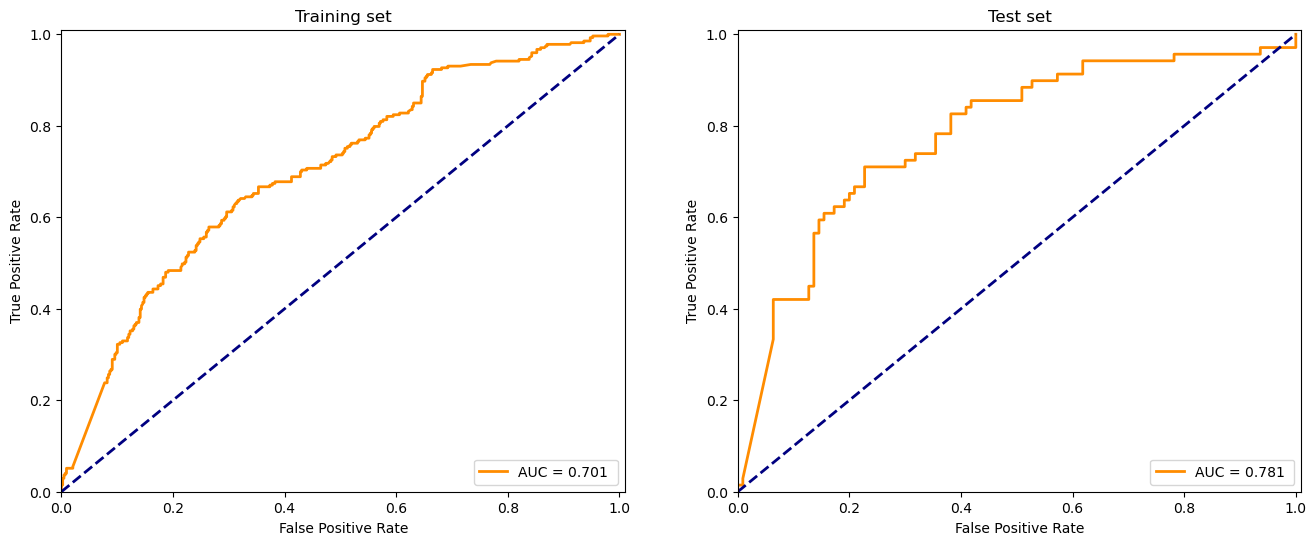

In [16]:
evaluate(MLPClassifier(alpha=1e-05, hidden_layer_sizes=(9, 2), random_state=1,
              solver='lbfgs'), X, y)

In [17]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import normalize

hidden_units=100 #numero de neuronas
hidden_layer_sizes=10
activation='relu'
solver='adam'
alpha=0.0001
batch_size='auto'
learning_rate='constant'
learning_rate_init=0.001 #learning rate keras
power_t=0.5
max_iter=200
shuffle=True
random_state=None
tol=0.0001
verbose=False
warm_start=False
momentum=0.9
nesterovs_momentum=True
early_stopping=False
validation_fraction=0.1
beta_1=0.9
beta_2=0.999
epsilon=1e-08
n_iter_no_change=10

In [18]:
X_train, X_test, y_train, y_test = train_test_split(normalize(X.values), y.values, test_size=.2,
                                                        random_state=0, shuffle=True)

In [19]:
model = Sequential() # Usamos  Keras y su modelo secuencial.
model.add(Dense(137, activation='relu', input_dim=X_train.shape[1]))
for i in range(hidden_layer_sizes): #for para numero de capas ocultas.
    model.add(Dense((420 + i*2) // 2, activation='relu')) #Utilizamos la función de activación RelU en las capas añadidas.
    if (i % 4 == 0): model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) #Añadimos una capa de activación sigmoid como ultima capa.
sgd = SGD(learning_rate=0.001, decay=0.9, momentum=0.9, nesterov=True) # optimizador
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 137)               1096      
                                                                 
 dense_1 (Dense)             (None, 210)               28980     
                                                                 
 dropout (Dropout)           (None, 210)               0         
                                                                 
 dense_2 (Dense)             (None, 211)               44521     
                                                                 
 dense_3 (Dense)             (None, 212)               44944     
                                                                 
 dense_4 (Dense)             (None, 213)               45369     
                                                                 
 dense_5 (Dense)             (None, 214)               4

In [20]:
from keras.utils import to_categorical
clf = model.fit(X_train, to_categorical(y_train), epochs=300, batch_size=200,
              validation_data=(X_test, to_categorical(y_test)))





Epoch 1/300
4/4 [==============================] - 2s 139ms/step - loss: 0.6877 - accuracy: 0.6025 - val_loss: 0.6682 - val_accuracy: 0.6145
Epoch 2/300
4/4 [==============================] - 0s 21ms/step - loss: 0.6578 - accuracy: 0.6166 - val_loss: 0.6375 - val_accuracy: 0.6145
Epoch 3/300
4/4 [==============================] - 0s 22ms/step - loss: 0.6562 - accuracy: 0.6166 - val_loss: 0.6338 - val_accuracy: 0.6145
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 0.6404 - accuracy: 0.6166 - val_loss: 0.5950 - val_accuracy: 0.6145
Epoch 5/300
4/4 [==============================] - 0s 21ms/step - loss: 0.6296 - accuracy: 0.6166 - val_loss: 0.5933 - val_accuracy: 0.6145
Epoch 6/300
4/4 [==============================] - 0s 22ms/step - loss: 0.6333 - accuracy: 0.6166 - val_loss: 0.5981 - val_accuracy: 0.6145
Epoch 7/300
4/4 [==============================] - 0s 21ms/step - loss: 0.6319 - accuracy: 0.6166 - val_loss: 0.5742 - val_accuracy: 0.6145
Epoch 8/300
4/4 [==

6/6 [==============================] - 0s 4ms/step


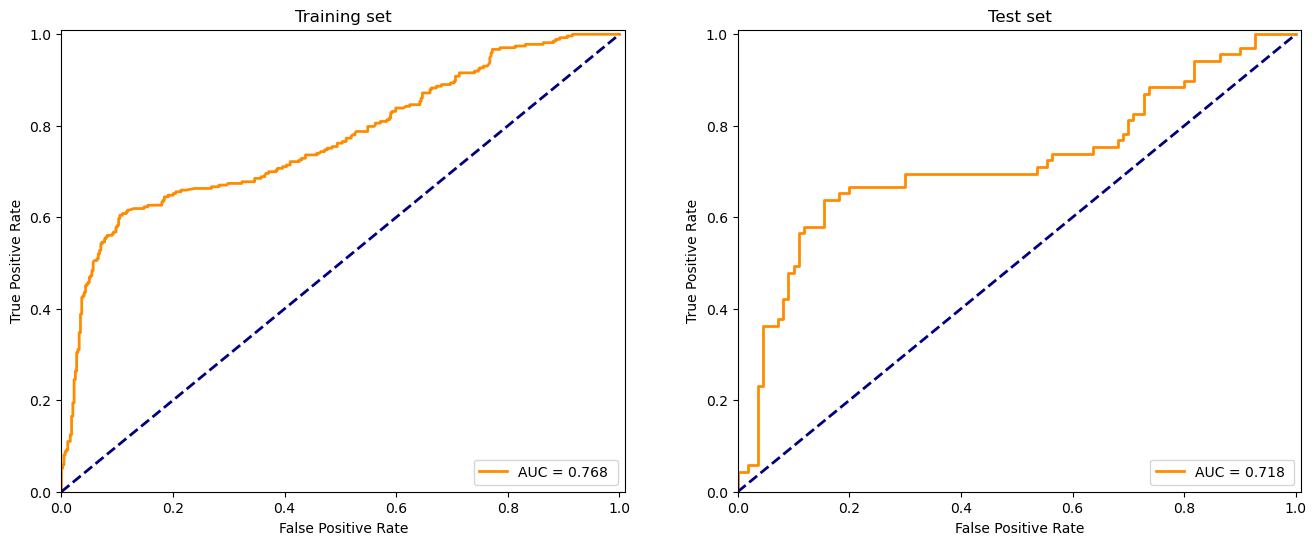

In [21]:
evaluate(model, X.values, y.values, fitted=True)

### Modelo 2


In [30]:
model = Sequential()

learning_rate=0.009

# Capa 1
model.add(Dense(20, kernel_initializer = 'uniform', activation='relu', input_dim=X_train.shape[1]))
# Capa 2
model.add(Dense(20, kernel_initializer = 'uniform', activation='relu'))
# Capa de Salida
model.add(Dense(1, kernel_initializer = 'uniform', activation='sigmoid'))

Epoch 1/20
45/45 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.6053
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6166
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6166
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6166
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6166
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6208
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6225 - accuracy: 0.6699
Epoch 8/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.6699
Epoch 9/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6699
Epoch 10/20
45/45 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.6742
Epoch 11/20
45/45 [

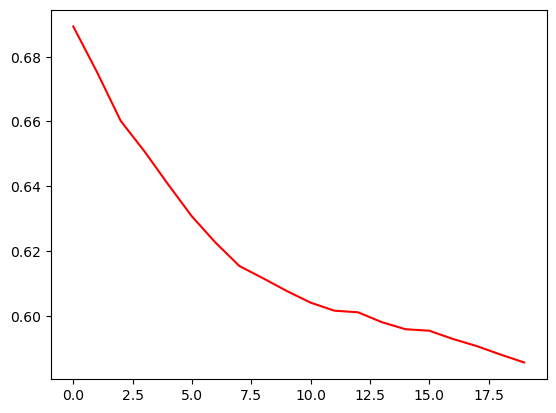

In [31]:
# define our loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the parameters
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

# evaluate accuracy
train_acc = model.evaluate(X_train, y_train, batch_size=16)[1]
test_acc = model.evaluate(X_test, y_test, batch_size=16)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']

plt.plot(range(len(losses)), losses, 'r')
plt.show()